# Data distribution over multiple influenza seasons
We will analyze the distribution (the number of samples) of data for each of the 37 influenza seasons from 2003NH to 2021NH, under the seasonal framework (Fig1a in the paper and also shown below).

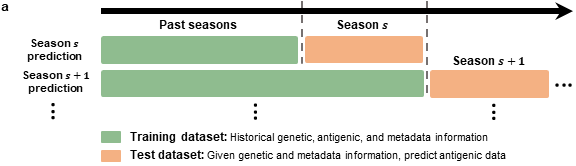

## Imports

In [1]:
from pathlib import Path
import pandas as pd
import utilities   # self defined functions

## Variables

In [2]:
mut_mat = "binary"   # mutation matrix (HA1 sequences will not be used in this notebook)
Seasons = [str(year)+s for year in range (2003, 2021) for s in ["NH", "SH"]] + ["2021NH"] # all the seasons

## Paths and filenames

In [3]:
# paths
path_data   = "../data/"   # path of data
path_result = "../results/SuppFig2_dataDistribution_performanceBaseline/"   # results will be saved in this directory
Path(path_result).mkdir(parents=True, exist_ok=True)   # make directory if it does not exist already

# filenames
data_fn = path_data + f"nhts_ha1_{mut_mat}.csv"   # input data
dist_fn = path_result + "SuppFig2a_seasonal_data_distribution.csv"   # filename for data distribution
fig_fn  = path_result + "SuppFig2a_seasonal_data_distribution.svg"   # filename for figure

## Read data
The CSV file consists of:
- 36,709 virus-antiserum pairs (data samples)
- 23 columns
    1. virus - str - name and passage combined with str "=", example: A/SLOVENIA/466/2013=MDCKX/SIAT1
    2. virusName - str - example: A/SLOVENIA/466/2013
    3. virusPassage - str - example: MDCKX/SIAT1
    4. virusPassCat - str - example: CELL
    5. virusDate - str - example: 2013-01-30
    6. virusGroup - str - example: 3C.3
    7. serum - str - name and passage combined with str "="
    8. serumName - str
    9. serumPassage - str
    10. serumPassCat - str
    11. serumDate - str
    12. serumGroup - str
    13. nht - float
    14. variant - int - binary indicator, virus-antiserum pair are antigenic variant (1) or similar (0)
    15. virusSeqDB - str - name of genetic database for virus sequence
    16. virusSeqID - str - accession number of virus sequence
    17. virusMatchedPass - str - virus passage from genetic database
    18. virusSeq - list of str - HA1 sequence of virus
    19. serumSeqDB - str - name of genetic database for serum sequence
    20. serumSeqID - str - accession number of serum sequence
    21. serumMatchedPass - str - serum passage from genetic database
    22. serumSeq - list of str - HA1 sequence of serum
    23. seq_diff - list of float - encoded genetic difference of virus-antiserum pair

In [ ]:
data = pd.read_csv(data_fn)

## Find number of data samples in training and (temporary) test datasets for each season

In [ ]:
# loop through each season
for season in Seasons:
    '''
    Train Test Split
        - based on seasonal framework
        - Train: past virus isolates paired with past sera
        - Test: circulating virus isolates paired with past sera
    '''
    ind_train, ind_test = utilities.seasonal_trainTestSplit(data[['virus', 'serum', 'virusDate', 'serumDate']], season)
    
    # training dataset
    data_train = data.iloc[ind_train].copy()
    data_train.reset_index(drop=True, inplace=True)
    
    # test dataset
    data_test = data.iloc[ind_test].copy()
    data_test.reset_index(drop=True, inplace=True)
    
    
    '''
    Number of data samples
    '''
    # compute and save data distribution for the training dataset
    dist_cols    = ['season', 'dataset']   # information to be saved in CSV file
    dist_col_val = [season, 'Train']
    utilities.data_distribution(data_train.nht.values, dist_fn, dist_cols, dist_col_val)

    # compute and save data distribution for the test dataset
    dist_col_val = [season, 'Test']
    utilities.data_distribution(data_test.nht.values, dist_fn, dist_cols, dist_col_val)

## Imports and configuration for plotting

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context(rc={"axes.labelsize":9,
                    "xtick.labelsize":8,
                    "ytick.labelsize":8,
                    "legend.fontsize":8,
                    "legend.title_fontsize":8})

## Read data distribution

In [5]:
data_plot = pd.read_csv(dist_fn)

## Plot no. of virus-antiserum pairs per season for train and test datasets and save figure

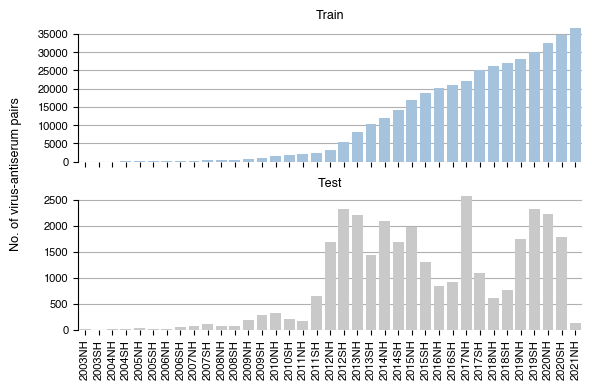

In [6]:
# two subfigures
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(6.5,4))

# plot total no. of virus-antiserum pairs per season for train dataset
sns.barplot(x='season', y='total', data=data_plot[data_plot.dataset == 'Train'],
            ax=axes[0], color='#9DC3E6')

# plot total no. of virus-antiserum pairs per season for test dataset
sns.barplot(x='season', y='total', data=data_plot[data_plot.dataset == 'Test'],
            ax=axes[1], color='#C9C9C9')

# configurations for figure
axes[0].set_axisbelow(True)
axes[1].set_axisbelow(True)
axes[0].grid(axis='y', zorder=0)
axes[1].grid(axis='y', zorder=0)
axes[0].set_yticks(range(0,35001,5000))
axes[0].set_yticklabels(range(0,35001,5000))
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)
axes[0].set_title("Train", fontsize=9, pad=-2)
axes[1].set_title("Test", fontsize=9, pad=-5)
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[0].set_ylabel("")
axes[1].set_ylabel("")
fig.supylabel("No. of virus-antiserum pairs", fontsize=9)

sns.despine(trim=True, bottom=True)

# save figure
fig.savefig(fig_fn, format='svg', bbox_inches='tight')